<a href="https://colab.research.google.com/github/MoMahmoud8/intel-image-classification/blob/main/intel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 14

In [2]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/puneet6060/intel-image-classification')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mostafamahmoudhassan
Your Kaggle Key: ··········


100%|██████████| 346M/346M [00:03<00:00, 101MB/s]


In [3]:
img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory('/content/intel-image-classification/seg_train/seg_train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='sparse')
test_generator = test_datagen.flow_from_directory('/content/intel-image-classification/seg_test/seg_test',
                                                  target_size=(img_size, img_size),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  class_mode='sparse')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


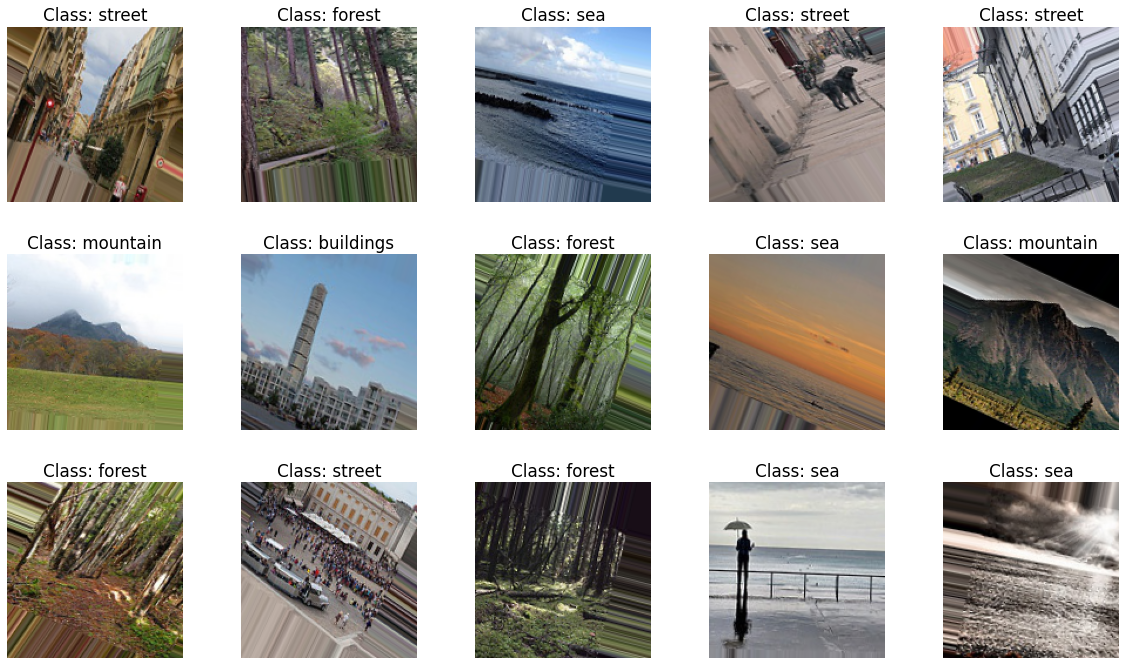

In [4]:
labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


samples = train_generator.__next__() 
images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape= (img_size,img_size,3), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [16]:
import keras
epochs = 100
batch_size = 128
# train_steps = X_train.shape[0] // batch_size
# valid_steps = X_test.shape[0] // batch_size
#early stop
es = keras.callbacks.EarlyStopping(
        monitor="val_accuracy", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )
#ReduceLROnPlateau
rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [17]:

# Fit the model
history = model.fit_generator(train_generator, 
                              epochs = epochs, 
                              validation_data = test_generator,
                              callbacks=[es, rp])

<ipython-input-17-083fee6cbc98>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/100
439/439 [==============================] - 98s 223ms/step - loss: 0.5222 - accuracy: 0.8148 - val_loss: 0.4308 - val_accuracy: 0.8417 - lr: 0.0010
Epoch 2/100
439/439 [==============================] - 96s 218ms/step - loss: 0.5127 - accuracy: 0.8179 - val_loss: 0.4193 - val_accuracy: 0.8567 - lr: 0.0010
Epoch 3/100
439/439 [==============================] - 98s 223ms/step - loss: 0.4965 - accuracy: 0.8245 - val_loss: 0.4060 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 4/100
439/439 [==============================] - 96s 220ms/step - loss: 0.5005 - accuracy: 0.8213 - val_loss: 0.4652 - val_accuracy: 0.8340 - lr: 0.0010
Epoch 5/100
439/439 [==============================] - 94s 214ms/step - loss: 0.4765 - accuracy: 0.8308 - val_loss: 0.4085 - val_accuracy: 0.8553 - lr: 0.0010
Epoch 6/100
439/439 [==============================] - ETA: 0s - loss: 0.4590 - accuracy: 0.8387
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
439/439 [======================

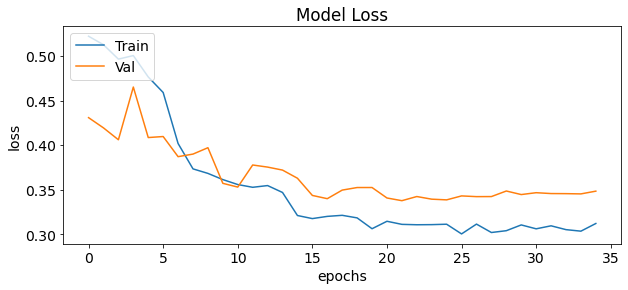

In [18]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

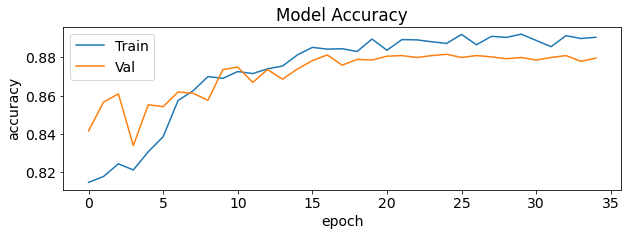

In [19]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [20]:
predictions = model.predict(test_generator)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

print('Predicted classes:', predicted_classes)
print('True labels:', test_generator.classes)

94/94 [==============================] - 4s 43ms/step
Predicted classes: [0 0 0 ... 3 5 5]
True labels: [0 0 0 ... 5 5 5]


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Accuracy:\n', accuracy_score(test_generator.classes, predicted_classes))


Accuracy:
 0.8816666666666667


In [22]:
print('Classification Report:\n', classification_report(test_generator.classes, predicted_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       437
           1       0.96      0.99      0.98       474
           2       0.86      0.81      0.83       553
           3       0.84      0.82      0.83       525
           4       0.90      0.89      0.90       510
           5       0.88      0.92      0.90       501

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



In [23]:
print('Confusion Matrix:\n', confusion_matrix(test_generator.classes, predicted_classes))


Confusion Matrix:
 [[384   1   1   0   2  49]
 [  2 469   0   1   1   1]
 [  8   6 447  67  18   7]
 [  6   4  59 430  24   2]
 [ 17   5  15  13 456   4]
 [ 31   2   0   3   6 459]]


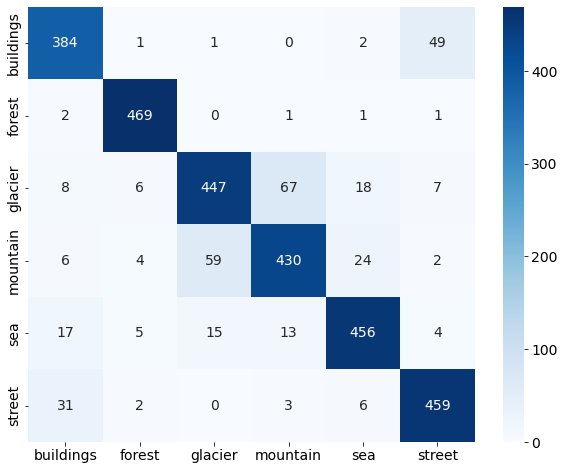

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(test_generator.classes, predicted_classes),annot=True,fmt='.3g',xticklabels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
            yticklabels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],cmap='Blues')
plt.show()